In [6]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Acessando o pacote time series e pegando a função seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Acessando o plotting do pandas e acessando a função que ajuda o matplot a exibir tipos de dados pandas
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
dateparse = lambda dates : datetime.strptime(dates, '%Y-%m')

base = pd.read_csv('AirPassengers.csv', parse_dates= ['Month'], index_col='Month', date_parser=dateparse)
base

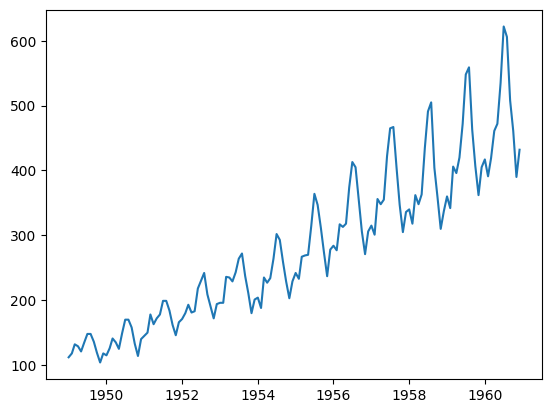

In [19]:
plt.plot(base['#Passengers'])

In [13]:
#Decomposição da série temporal
decomposicao = seasonal_decompose(base['#Passengers'])

In [20]:
#Vendo a Tendência de uma série temporal
tendencia = decomposicao.trend;
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [22]:
#Sazonalidade
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [31]:
# erro residual, parte não explicada
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

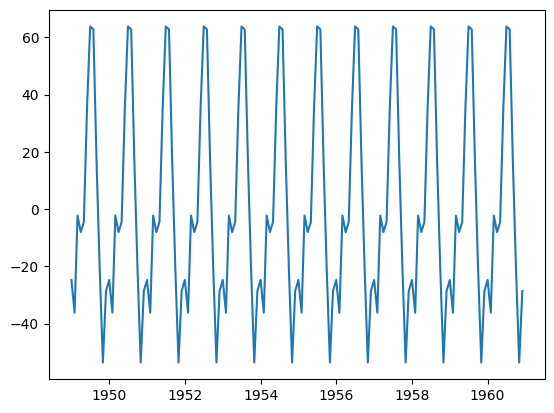

In [30]:
# Visualização de forma gráfica para cada parte da série temporal
plt.plot(sazonal)

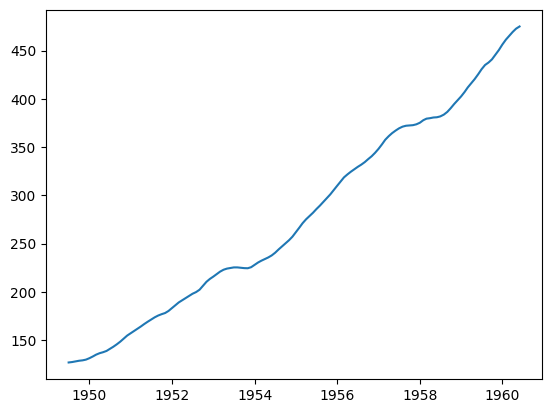

In [32]:
plt.plot(tendencia)

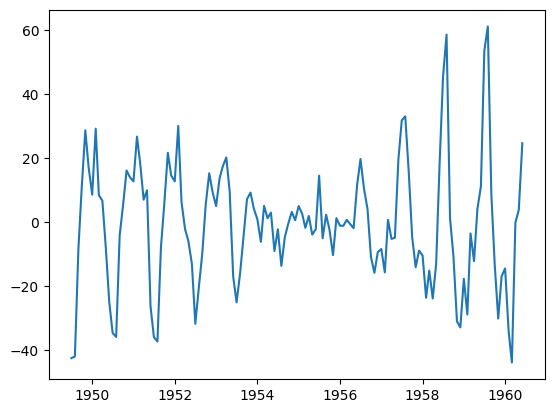

In [34]:
plt.plot(aleatorio)

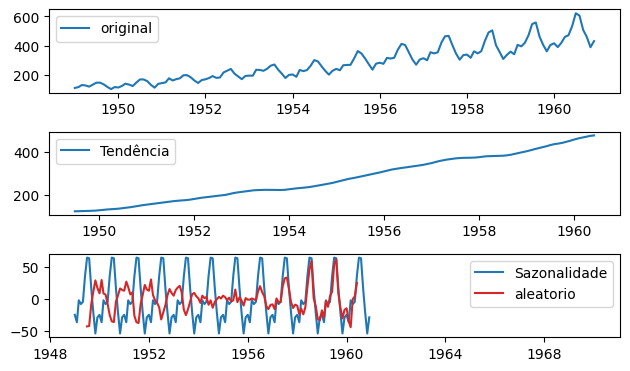

In [38]:
plt.subplot(4,1,1)
plt.plot(base['#Passengers'], label='original')
plt.legend(loc = 'best')

#Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='best')

#Visualização somente da Sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Visualização somente da erro residual
plt.plot(4,1,4)
plt.plot(aleatorio, label = 'aleatorio')
plt.legend(loc = 'best')
plt.tight_layout()

